In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile
from pathlib import Path

In [2]:
zip_path = Path("../Data/Glacier.zip")  # your .zip file
extract_dir = Path("../Data/")          # folder to extract to

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")


Extraction complete.


In [3]:
df = pd.read_csv("../Data/Glacier/Glacier_transient_vel.csv")
#Identify stations and their velocity data
stations = []
for col in df.columns:
    if "_DOY" in col:
        station = col.split("_DOY")[0]
        vel_col = f"{station}_VEL"
        if vel_col in df.columns:
            stations.append(station)

print(stations)



['FL03', 'FL04', 'NL01', 'NL02', 'NL03', 'NL04', 'NL06', 'NL07', 'NL08', 'NL09', 'NL10', 'NL11', 'NL12', 'NL13', 'NLBS']


/tmp/ipykernel_14706/3447927044.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/aryaman/Greenland_Transient_Velocity_Event_Characterizer/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


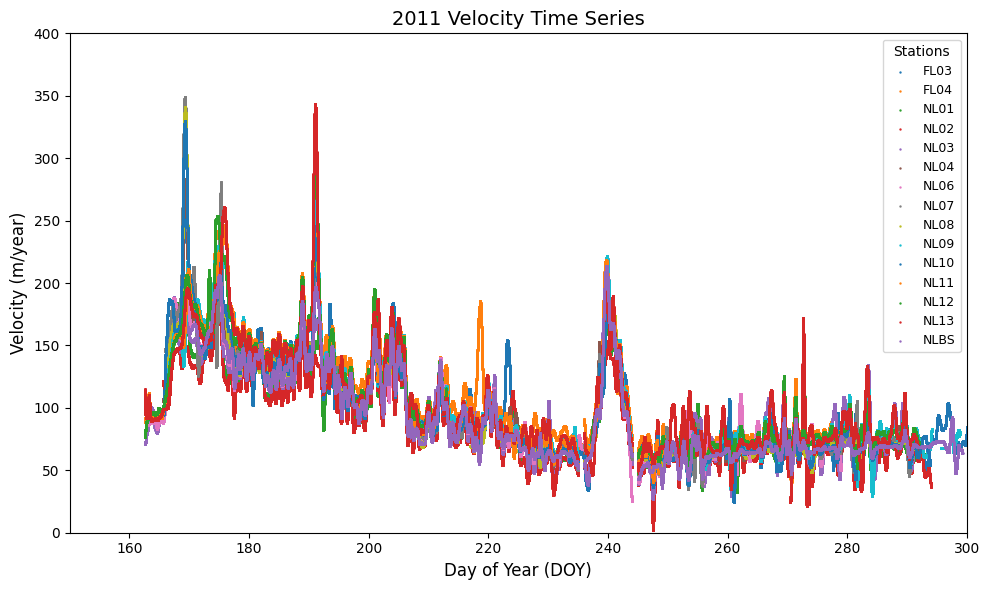

     FL03_DOY    FL03_VEL    FL04_DOY    FL04_VEL    NL01_DOY    NL01_VEL  \
0  166.000000  110.862150  166.000347  110.335837  166.500347  104.026096   
1  166.000347  110.877676  166.000694  110.356936  166.500694  104.048007   
2  166.000694  110.893168  166.001041  110.377957  166.501041  104.069869   
3  166.001041  110.908615  166.001388  110.398957  166.501388  104.091734   
4  166.001388  110.923996  166.001736  110.419900  166.501736  104.113622   

     NL02_DOY    NL02_VEL    NL03_DOY   NL03_VEL  ...    NL10_DOY   NL10_VEL  \
0  165.613194  121.478089  162.637152  70.692735  ...  165.671875  94.420204   
1  165.613541  121.463523  162.637500  70.708288  ...  165.672222  94.422913   
2  165.613888  121.448968  162.637847  70.723857  ...  165.672569  94.425794   
3  165.614236  121.434373  162.638194  70.739487  ...  165.672916  94.428810   
4  165.614583  121.419792  162.638541  70.755152  ...  165.673263  94.431942   

     NL11_DOY   NL11_VEL    NL12_DOY   NL12_VEL    NL13_

In [4]:
#Plot Time Series of Station Velocities
plt.figure(figsize=(10,6))

for station in stations:
    doy_col = f"{station}_DOY"
    vel_col = f"{station}_VEL"

    x=df[doy_col]
    y=df[vel_col]

    #plt.plot(x, y, marker='.', markersize=3, label=station)
    plt.scatter(x, y, s=0.5, label=station)

plt.title("2011 Velocity Time Series", fontsize=14)
plt.xlabel("Day of Year (DOY)", fontsize=12)
plt.ylabel("Velocity (m/year)", fontsize=12)
plt.xlim(150, 300)
plt.ylim(0, 400)
plt.legend(title="Stations", fontsize=9)
plt.tight_layout()

plt.show()

print(df.head())
print(df.columns)